1. Import libraries

In [53]:
import gym
import random
import numpy as np

In [54]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

2. Initialize the environment

In [55]:
environment = gym.make("CliffWalking-v0", new_step_api=True)
environment.reset()


36

3. Initialize the Q-table with zeros

In [56]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
#qtable = np.zeros((16, 4))

# Alternatively, the gym library can also directly
# give us the number of states and actions using
# "env.observation_space.n" and "env.action_space.n"
nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
print('states = ', nb_states, 'actions' , nb_actions)
qtable = np.zeros((nb_states, nb_actions))

# Let's see how it looks
print('Q-table =')
print(qtable)

states =  48 actions 4
Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


4. Try to take any random action:
LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3

In [57]:
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
new_state, reward, done,truncate, info = environment.step(action)

# Display the results (reward and map)
print(f'Reward = {reward}')

Reward = -1


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [58]:
environment.reset()


36

In [59]:
# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


5. Training of Q-Learning

In [60]:
# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    total_rewards = 0
    # By default, we consider our outcome to be a failure
    #outcomes.append("Failure")
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state,:]) > 0:
          action = np.argmax(qtable[state,:])
        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncate, info = environment.step(action)
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state,:]) - qtable[state, action])
        # Update our current state
        state = new_state
        # If we have a reward, it means that our outcome is a success
        total_rewards += reward
    outcomes.append(total_rewards)


In [61]:
print(outcomes)


[-104632, -59152, -54394, -36562, -68139, -233653, -81625, -291397, -65314, -21021, -7233, -16333, -38252, -88961, -70330, -27279, -17785, -173898, -81303, -57496, -3223, -45736, -47301, -12903, -49133, -29718, -1022, -67615, -114016, -49425, -74170, -40383, -238281, -42625, -116312, -30698, -27223, -3151, -9021, -47968, -65717, -22451, -2710, -241933, -18781, -7470, -43489, -124372, -91132, -230157, -25125, -85068, -125649, -173706, -154929, -1565, -64405, -38397, -7731, -114868, -44216, -3358, -13854, -48972, -82479, -12880, -74994, -88524, -7013, -7144, -80096, -40254, -11815, -7069, -126204, -3932, -26358, -11944, -32273, -77575, -8479, -95730, -44999, -67625, -83825, -93149, -842, -59320, -13649, -74864, -168819, -56564, -2962, -132158, -104006, -10491, -2643, -25502, -74763, -47142, -12717, -84822, -43132, -74773, -34071, -11098, -211849, -25002, -47053, -99468, -111972, -19459, -14586, -49357, -29391, -26755, -6959, -13169, -82908, -3784, -28978, -84443, -6241, -113028, -23981, 


Q-table after training:
[[  -7.94108868   -7.71232075   -7.71232075   -7.94108868]
 [  -7.71232075   -7.45813417   -7.45813417   -7.94108868]
 [  -7.45813417   -7.17570464   -7.17570464   -7.71232075]
 [  -7.17570464   -6.86189404   -6.86189404   -7.45813417]
 [  -6.86189404   -6.5132156    -6.5132156    -7.17570464]
 [  -6.5132156    -6.12579511   -6.12579511   -6.86189404]
 [  -6.12579511   -5.6953279    -5.6953279    -6.5132156 ]
 [  -5.6953279    -5.217031     -5.217031     -6.12579511]
 [  -5.217031     -4.68559      -4.68559      -5.6953279 ]
 [  -4.68559      -4.0951       -4.0951       -5.217031  ]
 [  -4.0951       -3.439        -3.439        -4.68559   ]
 [  -3.439        -3.439        -2.71         -4.0951    ]
 [  -7.94108868   -7.45813417   -7.45813417   -7.71232075]
 [  -7.71232075   -7.17570464   -7.17570464   -7.71232075]
 [  -7.45813417   -6.86189404   -6.86189404   -7.45813417]
 [  -7.17570464   -6.5132156    -6.5132156    -7.17570464]
 [  -6.86189404   -6.12579511  

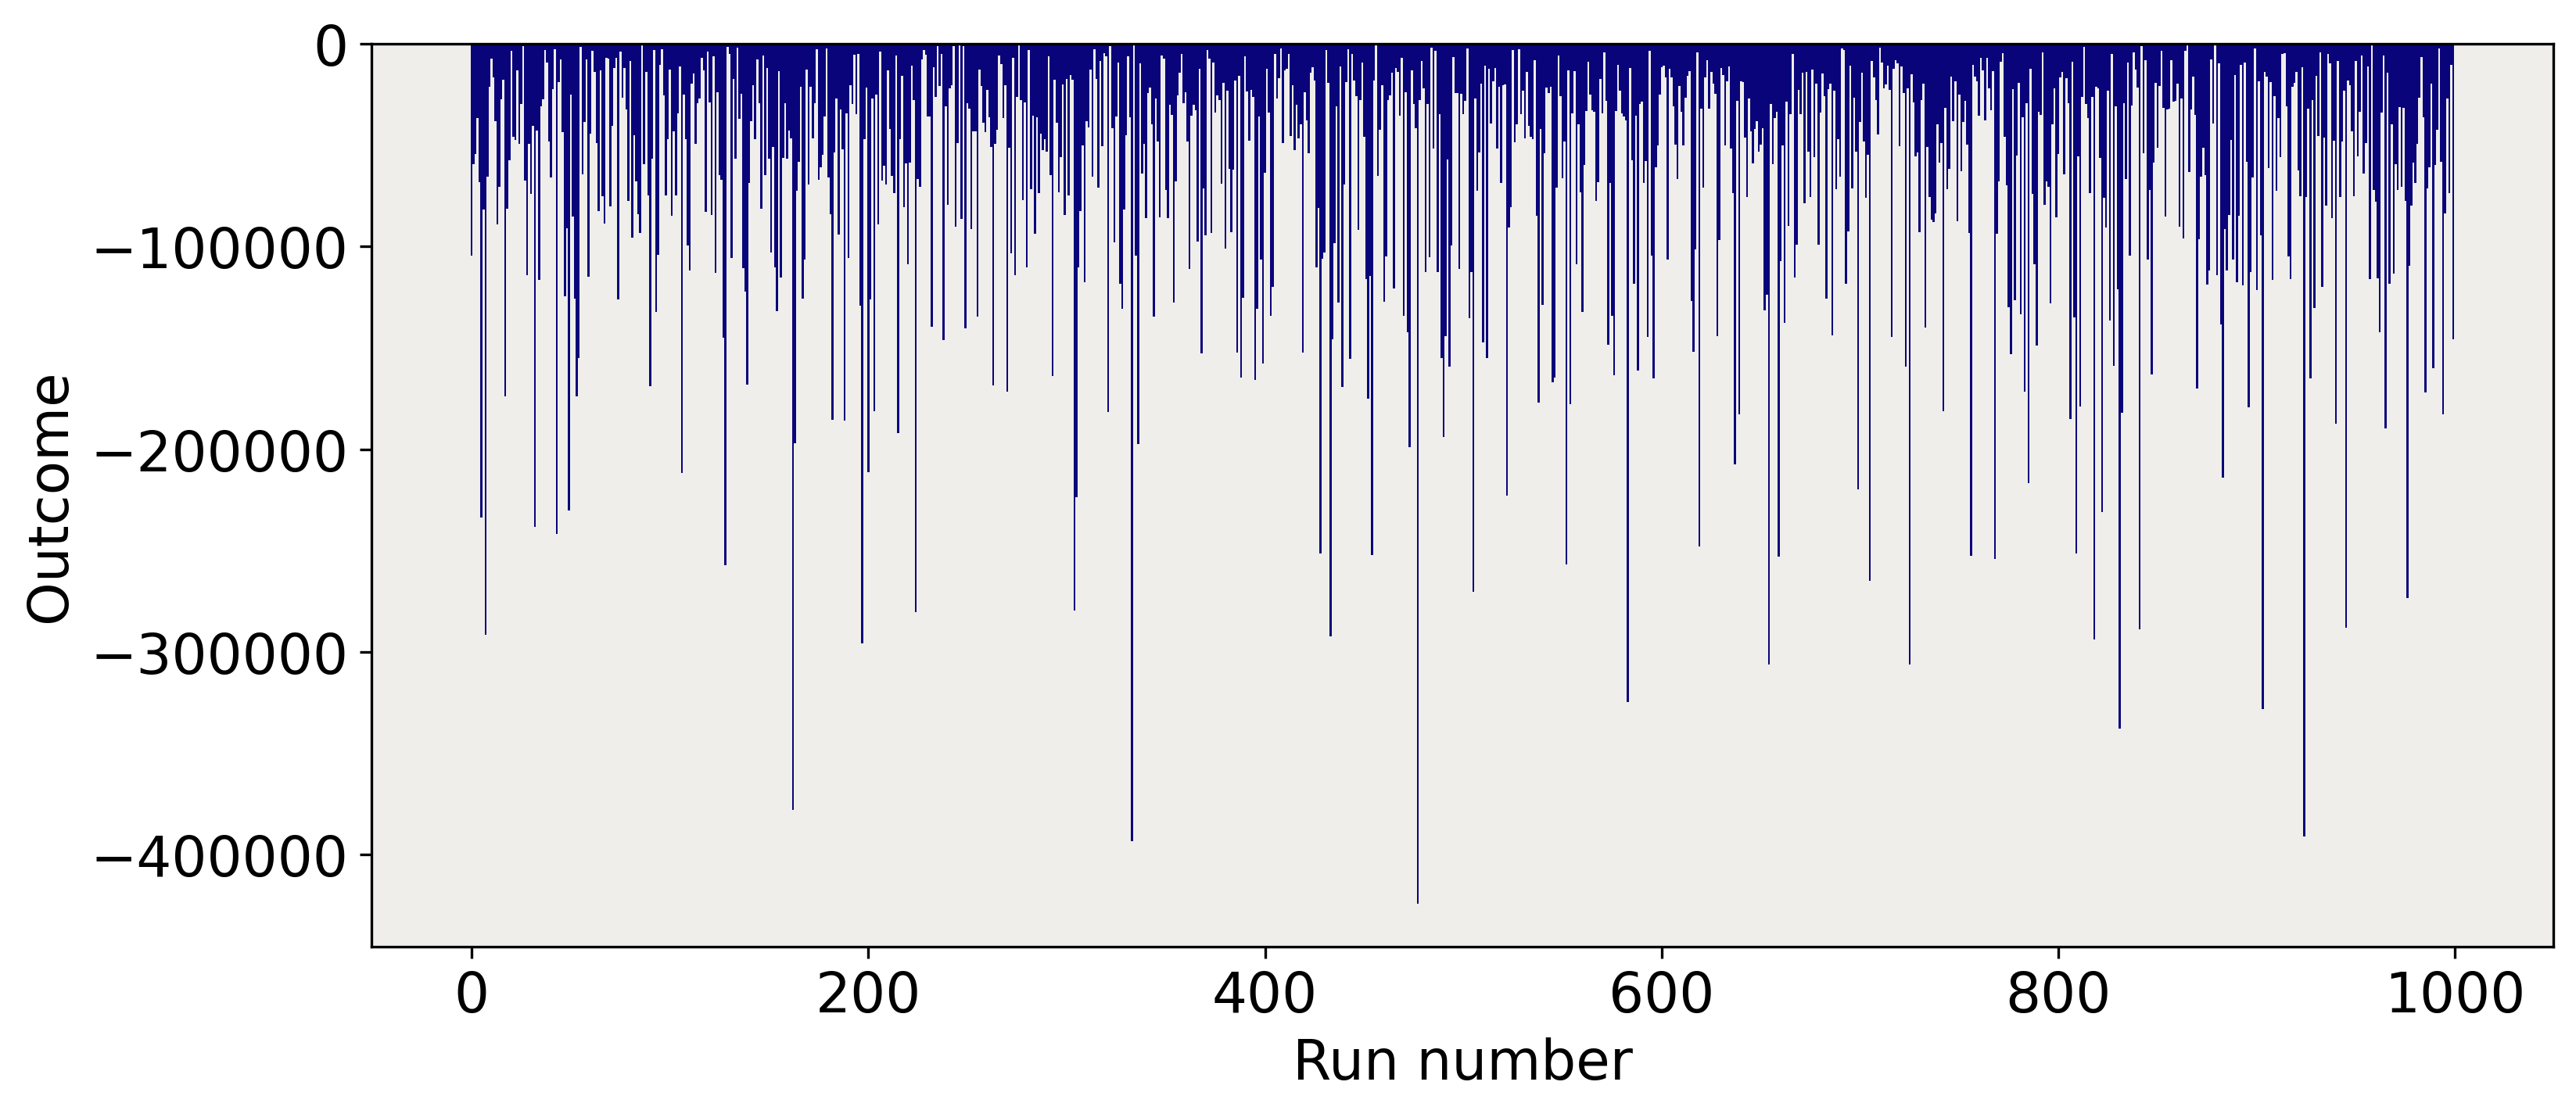

In [62]:
print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

6. Testing

In [81]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(100):
    state = environment.reset()
    done = False

    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state,:]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncate, info = environment.step(action)
        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
    if total_rewards <= -13:
        nb_success += 1

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


7. Greedy-epsilon

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[  -7.94108868   -7.71232075   -7.71232075   -7.94108868]
 [  -7.71232075   -7.45813417   -7.45813417   -7.94108868]
 [  -7.45813417   -7.17570464   -7.17570464   -7.71232075]
 [  -7.17570464   -6.86189404   -6.86189404   -7.458

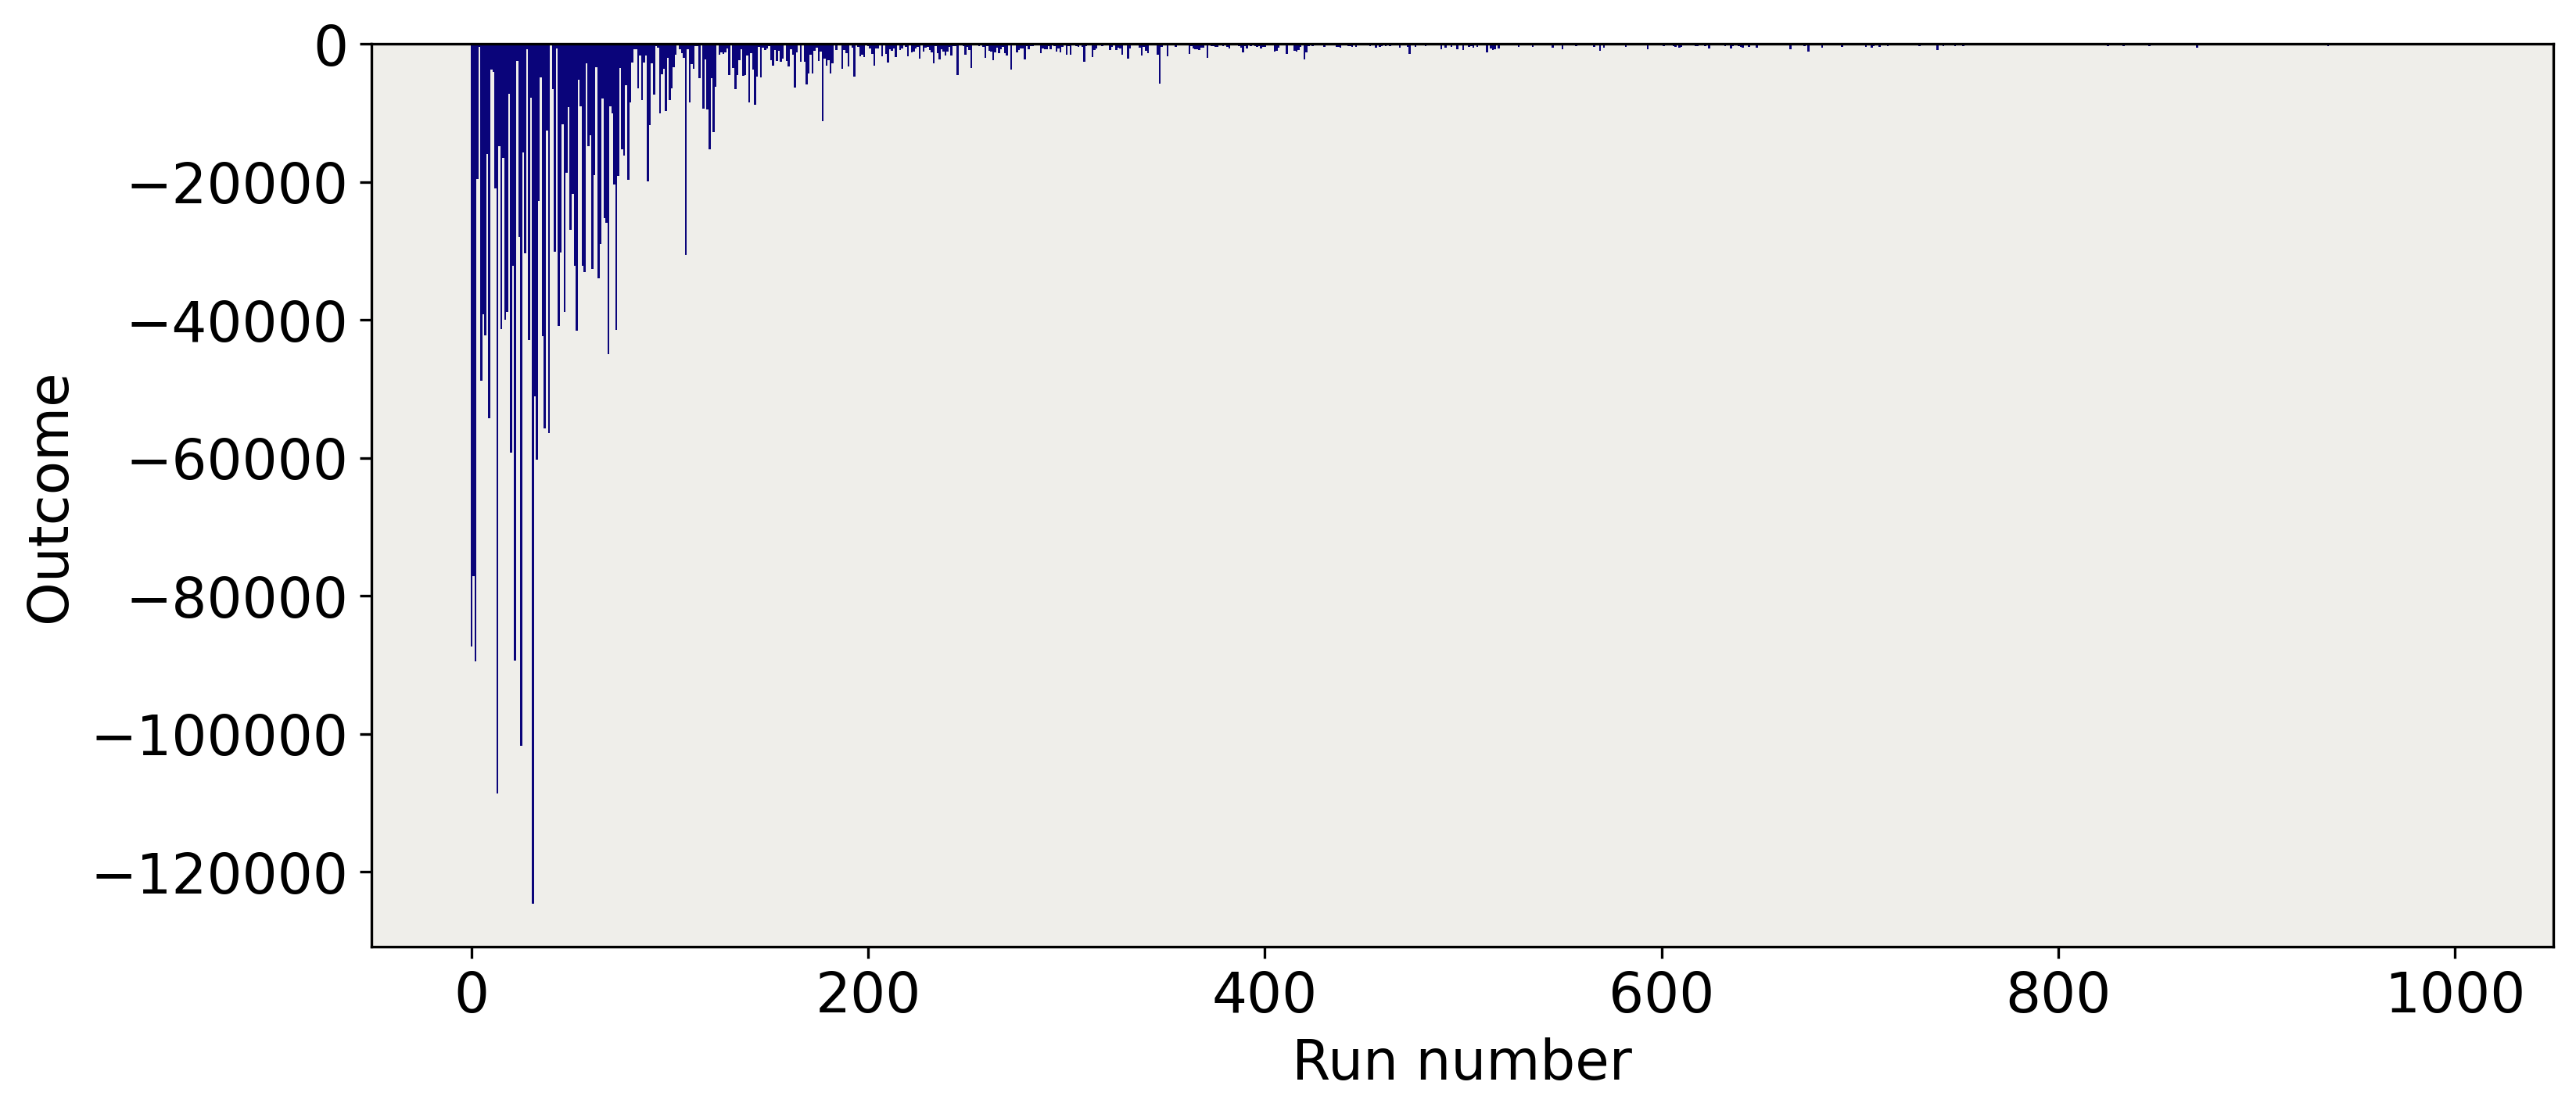

In [64]:
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0          # Amount of randomness in the action selection
epsilon_decay = 0.001  # Fixed amount to decrease

# List of outcomes to plot
outcomes.clear()

print('Q-table before training:')
print(qtable)
# Training
for _ in range(episodes):
    state = environment.reset()
    done = False
    total_rewards=0
    # By default, we consider our outcome to be a failure

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Generate a random number between 0 and 1
        rnd = np.random.random()

        # If random number < epsilon, take a random action
        if rnd < epsilon:
          action = environment.action_space.sample()
        # Else, take the action with the highest value in the current state
        else:
          action = np.argmax(qtable[state,:])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, truncate, info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state,:]) - qtable[state, action])

        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        total_rewards+=reward

    outcomes.append(total_rewards)
    # Update epsilon
    epsilon = max(epsilon - epsilon_decay, 0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()

In [80]:
episodes = 100
nb_success = 0

# Evaluation
for _ in range(episodes):
    state = environment.reset()
    done = False

    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        action = np.argmax(qtable[state,:])

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, _, _ = environment.step(action)

        # Update our current state
        state = new_state

    # Check if the episode ended in success (reached the goal with a reward >= -13)
    if total_rewards >= -13:  # Optimum reward
        nb_success += 1

# Let's check our success rate!
success_rate = nb_success / episodes * 100
print(f"Success rate = {success_rate}%")


Success rate = 100.0%
